In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## motus

In [5]:
bgi_bad = pd.read_csv("input/bgi_bad_list.csv")
ill_bad = pd.read_csv("input/ill_bad_list.csv")

# find common bad samples
common_bad = pd.merge(bgi_bad, ill_bad, how='inner', on=['sample'])

# find unique bad samples
bgi_bad_unique = bgi_bad[~bgi_bad['sample'].isin(common_bad['sample'])]
ill_bad_unique = ill_bad[~ill_bad['sample'].isin(common_bad['sample'])]

print("Number of bad samples in BGI: ", len(bgi_bad))
print("Number of bad samples in Illumina: ", len(ill_bad))
print("Number of common bad samples: ", len(common_bad))
print("Number of unique bad samples in BGI: ", len(bgi_bad_unique))
print("Number of unique bad samples in Illumina: ", len(ill_bad_unique))

bgi_bad_unique.to_csv("bgi_bad_unique.csv", index=False)

Number of bad samples in BGI:  100
Number of bad samples in Illumina:  57
Number of common bad samples:  57
Number of unique bad samples in BGI:  43
Number of unique bad samples in Illumina:  0


In [8]:
bgi_good = pd.read_csv("input/bgi_good_list.csv")
ill_good = pd.read_csv("input/ill_good_list.csv")

# find common good samples
common_good = pd.merge(bgi_good, ill_good, how='inner', on=['sample'])

# find unique good samples
bgi_good_unique = bgi_good[~bgi_good['sample'].isin(common_good['sample'])]
ill_good_unique = ill_good[~ill_good['sample'].isin(common_good['sample'])]

print("Number of good samples in BGI: ", len(bgi_good))
print("Number of good samples in Illumina: ", len(ill_good))
print("Number of common good samples: ", len(common_good))
print("Number of unique good samples in BGI: ", len(bgi_good_unique))
print("Number of unique good samples in Illumina: ", len(ill_good_unique))

bgi_good_unique.to_csv("bgi_good_unique.csv", index=False)

Number of good samples in BGI:  99
Number of good samples in Illumina:  35
Number of common good samples:  35
Number of unique good samples in BGI:  64
Number of unique good samples in Illumina:  0


## jellyfish

In [26]:
all_ill = pd.read_csv("input/all_ill_reads_list.csv",header=None)
all_ill.columns = ['sample_path']
all_ill['sample'] = all_ill['sample_path'].str.split('/').str[-1].str.split('.').str[0]
all_ill['sample'] = all_ill['sample'].str.split('_').str[1]
all_ill['sample'] = all_ill['sample'].str.split('-').str[0]
all_ill.tail(2)

,sample_path,sample
5016,/gpfs/space/GI/GV/Projects/Microbiome/Illumina...,VZZW6V
5017,/gpfs/space/GI/GV/Projects/Microbiome/Illumina...,VZZW6V


In [30]:
add_smpl = pd.read_csv("input/add_smpls_path.csv", sep='/', header=None)
add_smpl = add_smpl[16].to_frame()
add_smpl.columns = ['sample']
add_smpl['sample'] = add_smpl['sample']
add_smpl['sample'] = add_smpl['sample'].str.split('_').str[0]
add_smpl.to_csv("add_smpl.csv", index=False)

In [31]:
add_smpl.head(100).to_csv("add_smpl1.csv", index=False, header=False)
add_smpl.head(200).tail(100).to_csv("add_smpl2.csv", index=False, header=False)
add_smpl.head(300).tail(100).to_csv("add_smpl3.csv", index=False, header=False)
add_smpl.head(400).tail(100).to_csv("add_smpl4.csv", index=False, header=False)
add_smpl.head(500).tail(100).to_csv("add_smpl5.csv", index=False, header=False)
add_smpl.tail(92).to_csv("add_smpl6.csv", index=False, header=False)

In [29]:
mrg = add_smpl.merge(all_ill, on='sample', how='inner')
len(mrg['sample'].unique())


592

## Bad samlpes withing bgi-bgi subset

In [35]:
sb = pd.read_csv("input/samples_Bad.csv",header=None)
sb.columns = ['sample']
sw = pd.read_csv("input/samples_Wrs.csv",header=None)
sw.columns = ['sample']

bb = pd.read_csv("input/Intra-Platform_smpls_list_54_sorted.csv")
bb.columns = ['sample']
bb.head(2)

,sample
0,V09EVV
1,V0SVA4


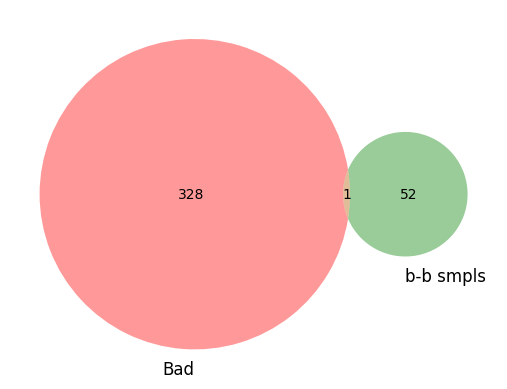

In [37]:
# venn diagram
venn2([set(sb['sample']), set(bb['sample'])], ('Bad', 'b-b smpls'))

In [39]:
set(sb['sample']).intersection(set(bb['sample']))

{'V5IRLB'}

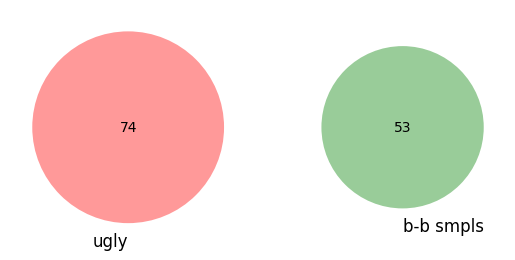

In [38]:
venn2([set(sw['sample']), set(bb['sample'])], ('ugly', 'b-b smpls'))

# filter out extra samples from motus results

In [20]:
bw = pd.read_csv('../step1_Reads_quality_comparison_FASTQ/results/Sequence_Duplication_Levels_warn_bgi.txt')
iw = pd.read_csv('../step1_Reads_quality_comparison_FASTQ/results/Sequence_Duplication_Levels_warn_ill.txt')
wrn = pd.concat([bw, iw], axis=0)

bfl = pd.read_csv('../step1_Reads_quality_comparison_FASTQ/results/Sequence_Duplication_Levels_fail_bgi.txt')
ifl = pd.read_csv('../step1_Reads_quality_comparison_FASTQ/results/Sequence_Duplication_Levels_fail_ill.txt')
fl = pd.concat([bfl, ifl], axis=0)

nGood = pd.concat([wrn, fl], axis=0)

bad = pd.read_csv('../step3_motus/input/samples_Bad.csv', header=None)
bad.columns = ['Sample']
wrs = pd.read_csv('../step3_motus/input/samples_Wrs.csv', header=None)
wrs.columns = ['Sample']

In [21]:
nGood['Filename']

,Filename
0,VZIO94
1,VP8AMJ
2,V7MUGL
3,VDOUU6
4,VT1CWP
...,...
18,VHB2F2
19,VLZ378
20,VBPRL4
21,V7EM4L


set()

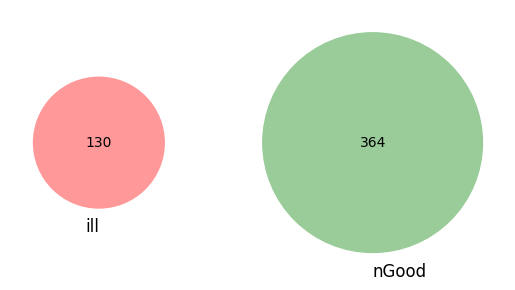

In [42]:
iBad = pd.read_csv("input/ill_motus_Bad_results.csv")
iBad = iBad.drop(columns=['V77S6P'])
iBad_smpls = iBad.columns

bBad = pd.read_csv("input/bgi_motus_Bad_results.csv")
bBad_smpls = bBad.columns

venn2([set(iBad_smpls), set(nGood['Filename'])], ('ill', 'nGood'))
set(iBad_smpls).intersection(set(nGood['Filename']))

In [43]:
# exclude from results
Bad_smpls = iBad_smpls[1:101]

iBad.set_index('consensus_taxonomy', inplace=True)
bBad.set_index('consensus_taxonomy', inplace=True)

# left only columns in Bad_smpls
iBad = iBad[Bad_smpls]
bBad = bBad[Bad_smpls]

iBad.to_csv("results/ill_motus_Bad_resultsF.csv")
bBad.to_csv("results/bgi_motus_Bad_resultsF.csv")

## Exclude wrn samples from 54 and 1990 final sets

In [46]:
intra = pd.read_csv("input/Intra-Platform_smpls_list_54_sorted.csv", header=None)
intra.columns = ['sample']

len(intra)

54

In [47]:
cross = pd.read_csv("input/Cross-Platform_smpls_list_1990_sorted.csv", header=None)
cross.columns = ['sample']

len(cross)

1990

set()

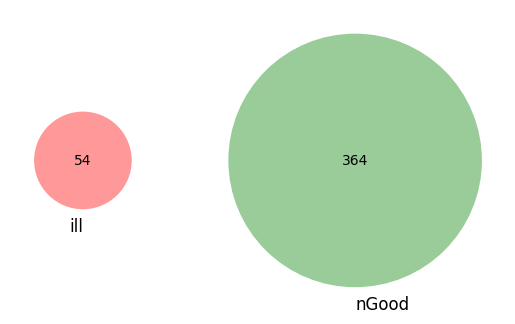

In [48]:
venn2([set(intra['sample']), set(nGood['Filename'])], ('ill', 'nGood'))
set(intra['sample']).intersection(set(nGood['Filename']))

{'V03HFT',
 'V0404P',
 'V0BI0R',
 'V0IQLM',
 'V0L9VT',
 'V0O0SI',
 'V0W7HW',
 'V0X3ZZ',
 'V19CVF',
 'V1C5D9',
 'V1DVG1',
 'V1EHS4',
 'V1F5KO',
 'V1FI7F',
 'V1HQZB',
 'V1OELW',
 'V1SUTZ',
 'V1WZON',
 'V20PN5',
 'V22M5I',
 'V247S0',
 'V25ZP5',
 'V2930P',
 'V2A14B',
 'V2EKJ0',
 'V2J7I2',
 'V2O8PG',
 'V3276M',
 'V33DNK',
 'V3B9IM',
 'V3EQF3',
 'V3H8VH',
 'V3K654',
 'V3V4R5',
 'V3VRBX',
 'V403E2',
 'V40FOF',
 'V412BS',
 'V44S08',
 'V47GD0',
 'V49CSW',
 'V4EROO',
 'V4IZWO',
 'V4OF9T',
 'V4R2BO',
 'V4RE1W',
 'V4UTSV',
 'V4X3XF',
 'V53FDC',
 'V54HHN',
 'V55KOT',
 'V5LLKT',
 'V5YC9E',
 'V5ZSBB',
 'V601ZE',
 'V6255X',
 'V62CWJ',
 'V62ZVR',
 'V67E83',
 'V67RSJ',
 'V68KXR',
 'V6B09P',
 'V6DO26',
 'V6JQBG',
 'V6PGJM',
 'V6QVBQ',
 'V6SUUS',
 'V6U9CP',
 'V704VW',
 'V7737A',
 'V7CDL5',
 'V7EM4L',
 'V7H80T',
 'V7IKOL',
 'V7MUGL',
 'V7RTZY',
 'V7UCXM',
 'V88BZU',
 'V89PC5',
 'V89RUE',
 'V8A98P',
 'V8BF42',
 'V8D7YS',
 'V8F1JC',
 'V8J895',
 'V8K3YM',
 'V8L57V',
 'V8L9OK',
 'V8NC3I',
 'V8R1TD',
 'V8RHG3',

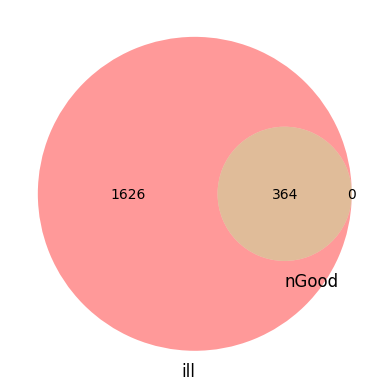

In [49]:
venn2([set(cross['sample']), set(nGood['Filename'])], ('ill', 'nGood'))
set(cross['sample']).intersection(set(nGood['Filename']))